# KMeans

In [ ]:
# importar numpy para trabalhar com matrizes e pandas para ler dados no formato frame
import numpy as np
import pandas as pd

# importar o pacote datasets do scikit-learn para carregar conjunto de dados
from sklearn import datasets

# importar KMeans para fazer agrupamento
from sklearn.cluster import KMeans

# importar o módulo pyplot para plotar o gráfico no método do cotovelo
import matplotlib.pyplot as plt

# Importar a classe MinMaxScaler para fazer pré-processamento
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import sklearn.metrics as sm 

from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_transformed.csv to df_transformed.csv


In [ ]:
import pandas as pd
import io
df_transformed = pd.read_csv(io.StringIO(uploaded['df_transformed.csv'].decode('utf-8')),header=0, sep=',')
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.928571,0.25,0.0,0.633333,0.659574,0.193548,0.194471,0.0,0.0,0.50,1.0,0.0,0.272727,0.578947,0.033333,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.25,0.0,0.000000,0.170213,0.741935,0.194471,1.0,0.0,0.25,1.0,0.0,0.454545,0.631579,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.821429,0.50,0.0,0.225926,0.978723,0.354839,0.194471,0.0,0.0,0.00,1.0,0.0,0.212121,0.631579,0.016667,1.0,0.0,0.0,0.0,0.0,0.0
3,0.250000,0.75,0.0,0.596296,0.000000,0.387097,0.194471,0.0,0.0,0.50,1.0,1.0,0.151515,0.263158,0.033333,1.0,0.0,0.0,0.0,0.0,0.0
4,0.821429,0.75,0.0,0.633333,0.659574,0.193548,0.194471,0.0,0.0,0.50,1.0,0.0,0.272727,0.578947,0.016667,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
range = range(1,15)

In [ ]:
sum_of_squared_distances = []                        # guarda o soma dos quadrados de cada agrupamento
for k in range:
  km = KMeans(n_clusters=k)                          # faz o agrupamento
  km = km.fit(df_transformed)
  sum_of_squared_distances.append(km.inertia_)

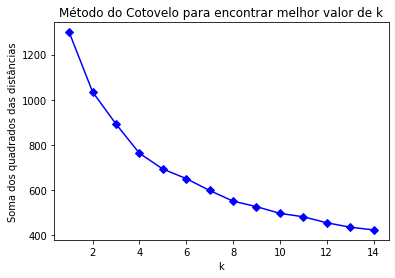

In [ ]:
plt.plot(range, sum_of_squared_distances, 'bD-')  # outros: ro, ro--, r+, rD-, bx-, b-, r-, bx, ro
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

In [ ]:
# Importar a biblioteca 'yellowbrick' (biblioteca de visualização) para ajudar a encontrar o k. 
%pip install -U -q dtreeviz seaborn yellowbrick

     |████████████████████████████████| 61 kB 921 bytes/s 


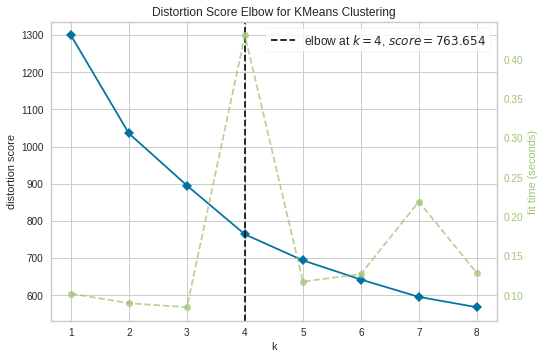

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# km_transformed = mms.transform(km)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,9))
visualizer.fit(df_transformed)
visualizer.show();

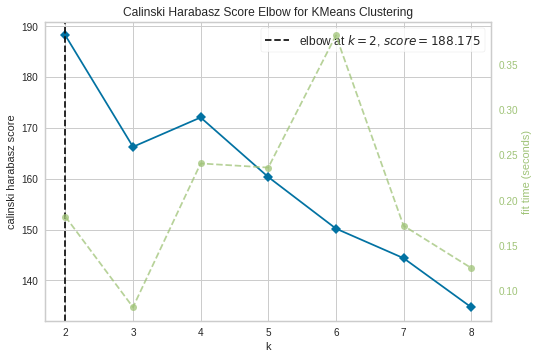

In [ ]:
visualizer1 = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz')
visualizer1.fit(df_transformed)
visualizer1.show();

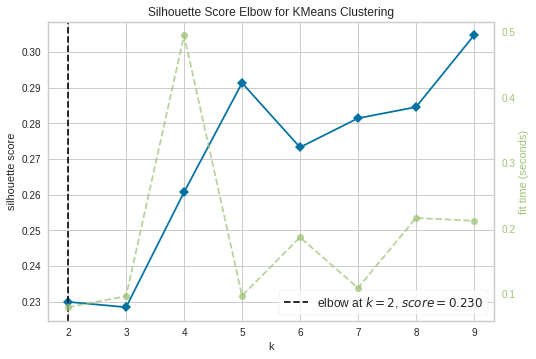

In [ ]:
visualizer2 = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer2.fit(df_transformed)
visualizer2.show();

In [ ]:
# Agrupar com KMeans e mostrar os centros obtidos
km = KMeans(n_clusters = 2)
km = km.fit(df_transformed)
centers = km.cluster_centers_
y_pred = km.labels_
print(centers)
print(y_pred)  # mostra os grupos 

[[ 6.91925466e-01  4.82608696e-01  4.97101449e-01  2.88454106e-01
   5.13922294e-01  3.24684432e-01  3.75394364e-01  5.65217391e-02
   1.09420290e-01  2.06521739e-01  6.52173913e-01  7.60869565e-02
   3.05994730e-01  4.01601831e-01  5.69021739e-02  1.00000000e+00
  -4.16333634e-16 -1.94289029e-16  2.63677968e-16 -1.21430643e-17
   6.59194921e-17]
 [ 6.77040816e-01  4.72321429e-01  5.44047619e-01  5.37539683e-01
   5.40729483e-01  2.72235023e-01  3.85209916e-01  5.00000000e-02
   7.73809524e-02  3.33928571e-01  4.28571429e-01  6.78571429e-02
   2.27272727e-01  4.08082707e-01  5.90178571e-02 -1.66533454e-15
   4.92857143e-01  3.42857143e-01  1.14285714e-01  2.14285714e-02
   2.85714286e-02]]
[1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0
 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1
 

# VALIDAÇÃO INTERNA

In [ ]:
# calcular índices internos para o agrupamento resultante

s = sm.silhouette_score(df_transformed, y_pred, metric='euclidean')    
print('Coeficiente de Silhueta: %0.3f' % s)

ch = sm.calinski_harabasz_score(df_transformed, y_pred)
print("Calinski_harabasz: %0.3f" %ch)

dbs = sm.davies_bouldin_score(df_transformed, y_pred)
print("Davies Bouldin: %0.3f" %dbs)

Coeficiente de Silhueta: 0.230
Calinski_harabasz: 188.175
Davies Bouldin: 1.916


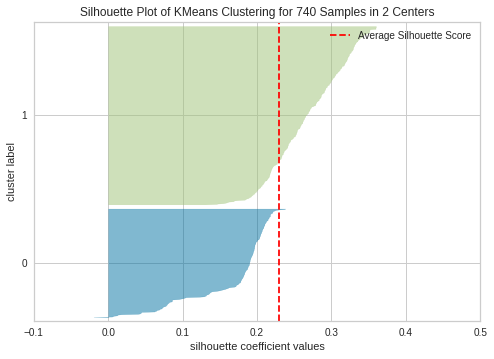

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters = 2, random_state=42)               # numero de grupos: 2 - ou seja, já é conhecido.
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_transformed)
visualizer.show();

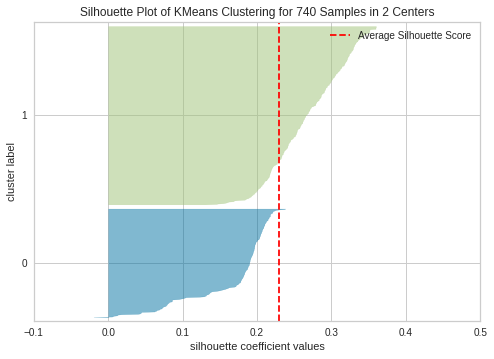

Coeficiente de Silhueta: 0.230
Calinski_harabasz: 188.175
Davies Bouldin: 1.916


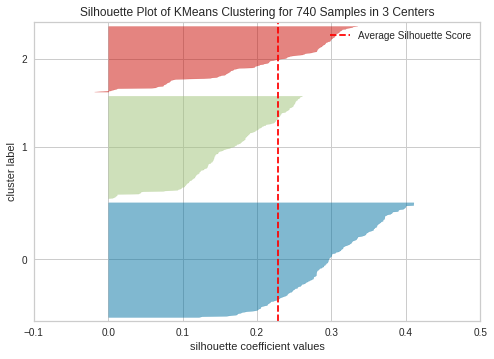

Coeficiente de Silhueta: 0.228
Calinski_harabasz: 166.275
Davies Bouldin: 1.717


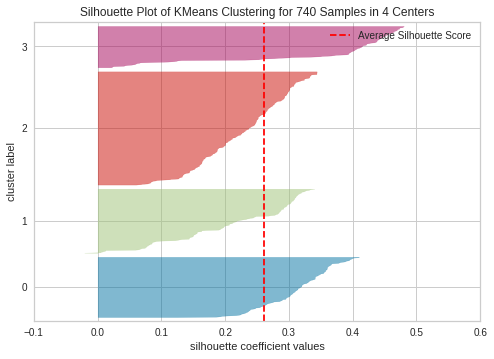

Coeficiente de Silhueta: 0.261
Calinski_harabasz: 172.046
Davies Bouldin: 1.521


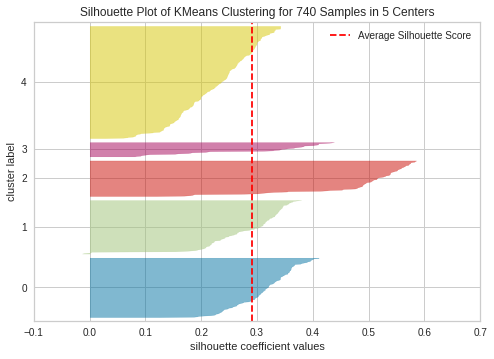

Coeficiente de Silhueta: 0.291
Calinski_harabasz: 160.338
Davies Bouldin: 1.403


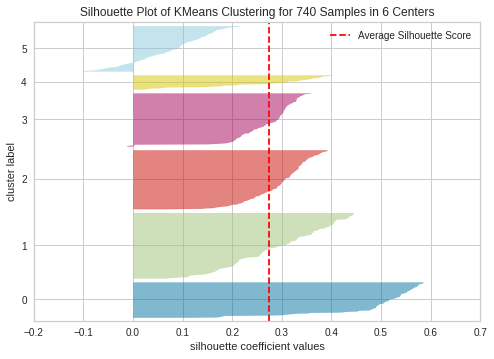

Coeficiente de Silhueta: 0.273
Calinski_harabasz: 150.202
Davies Bouldin: 1.623


In [ ]:
import sklearn.metrics as sm 
range_n_clusters = [2,3,4,5,6]   # tem que ter pelo menos 2 grupos; 

for n_clusters in range_n_clusters:
  model = KMeans(n_clusters, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizer.fit(df_transformed)
  visualizer.show();

  km = KMeans(n_clusters, random_state=42)
  km.fit(df_transformed)
  y_pred = km.labels_

  s = sm.silhouette_score(df_transformed, y_pred, metric='euclidean')    
  print('Coeficiente de Silhueta: %0.3f' % s)
  ch = sm.calinski_harabasz_score(df_transformed, y_pred)
  print("Calinski_harabasz: %0.3f" %ch)
  dbs = sm.davies_bouldin_score(df_transformed, y_pred)
  print("Davies Bouldin: %0.3f" %dbs)

# RESUMO:
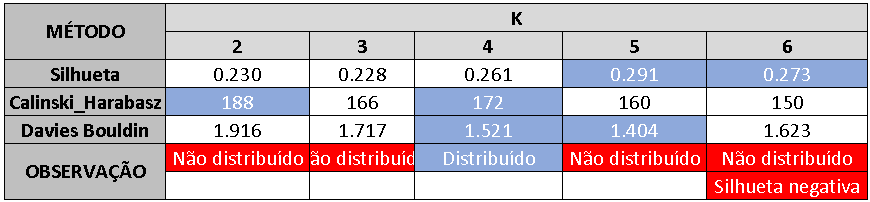

In [ ]:
# Analisando os gráficos acima, aparentemente com 4 centros é adequado
# Agrupar com KMeans e mostrar os centros obtidos
km = KMeans(n_clusters = 4)
km = km.fit(df_transformed)
centers = km.cluster_centers_
y_pred = km.labels_
print(centers)
print(y_pred)  # mostra os grupos 

[[ 6.82563025e-01  4.64705882e-01  5.03921569e-01  6.00000000e-01
   5.62703379e-01  3.51043643e-01  3.56438783e-01  3.52941176e-02
   1.03921569e-01  3.63235294e-01  6.70588235e-01  2.94117647e-02
   2.46524064e-01  4.59752322e-01  7.16666667e-02 -2.22044605e-16
   8.11764706e-01 -2.77555756e-16  1.41176471e-01 -1.73472348e-17
   4.70588235e-02]
 [ 7.06428571e-01  4.94166667e-01  5.00000000e-01  3.15012346e-01
   6.33829787e-01  3.79462366e-01  3.73386137e-01  7.33333333e-02
  -3.33066907e-16  2.83333333e-01  1.00000000e+00  5.00000000e-02
   3.10101010e-01  4.82807018e-01  6.10833333e-02  1.00000000e+00
  -3.60822483e-16  2.77555756e-16  2.01227923e-16  1.73472348e-17
   5.03069808e-17]
 [ 6.68506494e-01  4.84090909e-01  6.06060606e-01  4.41010101e-01
   5.06769826e-01  1.50439883e-01  4.29674394e-01  7.27272727e-02
   3.63636364e-02  2.88636364e-01  5.45454545e-02  1.27272727e-01
   1.97520661e-01  3.28229665e-01  3.94696970e-02  3.33066907e-16
   0.00000000e+00  8.72727273e-01  7.2